In [4]:
import os
import glob
import random
import shutil
from tempfile import gettempdir
from IPython.display import clear_output, Image
from torchvision.datasets.folder import pil_loader
from model import CAAE
from utils import pil_to_tensor_transforms
import hyperParams as hp

# UTKFace constants

MALE = 0
FEMALE = 1

WHITE = 0
BLACK = 1
ASIAN = 2
INDIAN = 3
OTHER = 4

# User constants

dset_path = os.path.join('.', 'data', 'UTKFace', 'unlabeled')
tempdir = gettempdir()

In [6]:
hp.NUM_Z_CHANNELS = 50  # we have two trained models, with 50 and 100
net = CAAE()
load_path = {50: r"./trained_model/",}[hp.NUM_Z_CHANNELS]
net.load(load_path, slim=True)  # slim tells the net to load only the encoder and generator

[09:51] Loaded E, G from ./trained_model/


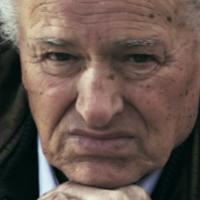

In [262]:
# Game 1: Age Progression/Regression
# Set the attributes of a random person you want to test
age = 80
gender = MALE

image_path = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}*'.format(a=age, g=gender))))
# image_path = './test/kriswu.jpg'
Image(filename=image_path)  # Will select and show a person with the attributes you selected

[10:10] Saved test result to /tmp/menifa.png


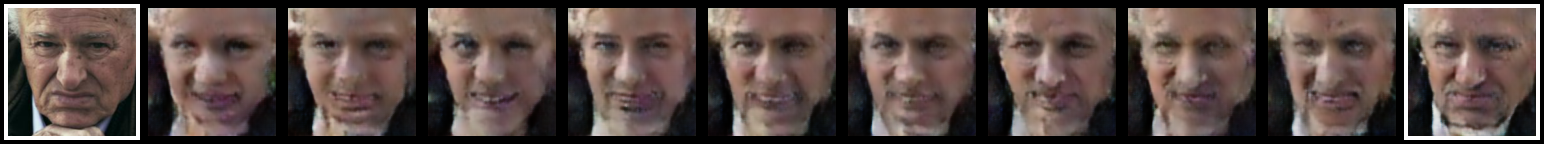

In [263]:
# Game 1: Age Progression/Regression
image_tensor = pil_to_tensor_transforms(pil_loader(image_path))
Image(filename=net.test_single(image_tensor=image_tensor, age=age, gender=gender, target=tempdir))